<a href="https://colab.research.google.com/github/marceloccs/visualizacao-dados-trilha-6/blob/main/Trilha_6_Visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de base de dados com infomações do Udemy de 2012 até 2017

Instancia o objeto que vamos usar no resto da pesquisa, alem de importar e instala as libs necessarias para uso.

In [108]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install pandas-profiling==2.7.1

Preparando importings

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas_profiling import ProfileReport
from datetime import datetime

Importando dataset

In [110]:
fields = ['is_paid', 'num_subscribers', 'num_reviews', 'level', 'price',
          'num_lectures', 'content_duration','published_timestamp','subject']

df = pd.read_csv('/content/drive/MyDrive/Pos-graduação (AI)/Trabalhos/Visualização de dados para tomada de decisão/udemy.zip',
                 parse_dates=['published_timestamp']
                )

Analise de perfil do meu dataFrame

In [119]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Realizar a analise de cursos pagos e não pagos baseado no numero de reviews e subscribes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


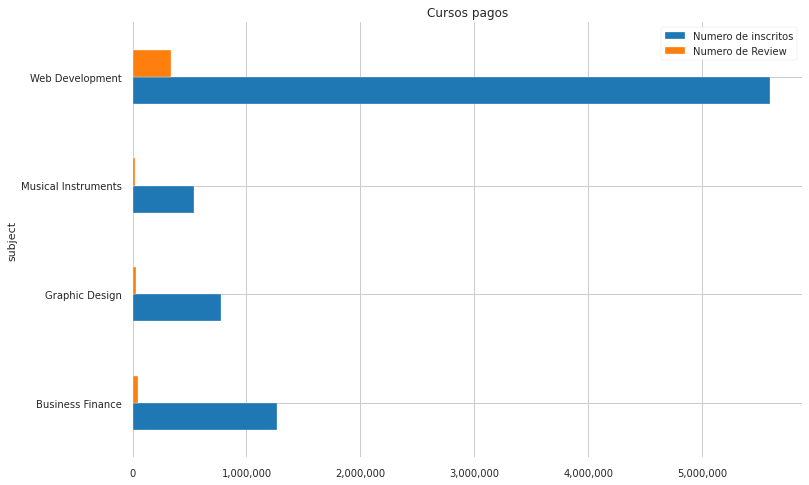

In [112]:
dfPaid = df.copy()
dfPaid = dfPaid.loc[dfPaid['is_paid'] == True]
dfPaid = dfPaid[['num_subscribers','num_reviews','subject']]
dfPaid.index=dfPaid['subject']

dfPaidSum = dfPaid.groupby([dfPaid.index])['num_subscribers','num_reviews'].sum()

plotPaid = dfPaidSum.plot(kind='barh', figsize=(12, 8), rot=0, grid=True,ylim=(0,5500),title="Cursos pagos")
plotPaid.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plotPaid.legend(["Numero de inscritos", "Numero de Review"]);

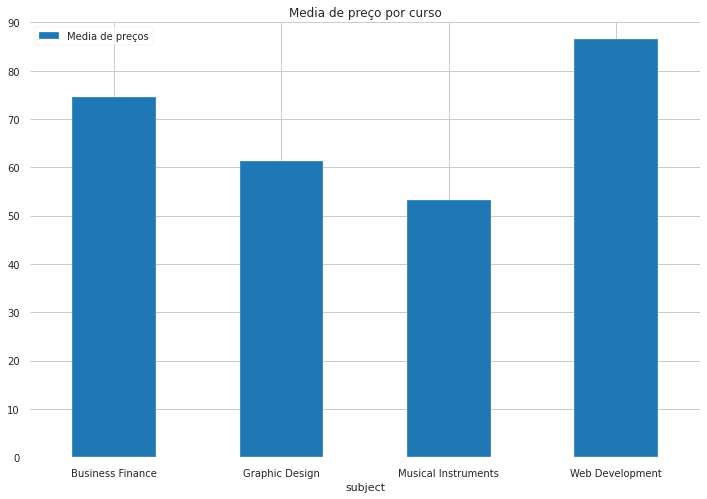

In [113]:
dfPaidPrice = df.copy()
dfPaidPrice = dfPaidPrice.loc[dfPaidPrice['is_paid'] == True]
dfPaidPrice = dfPaidPrice[['price','subject']]
dfPaidPrice.index=dfPaid['subject']

dfPaidPrice = dfPaidPrice.groupby([dfPaidPrice.index])['price'].mean();


plotPaidMean = dfPaidPrice.plot(kind='bar', figsize=(12, 8), rot=0, grid=True,ylim=(0,90),title="Media de preço por curso")
plotPaidMean.legend(["Media de preços"]);

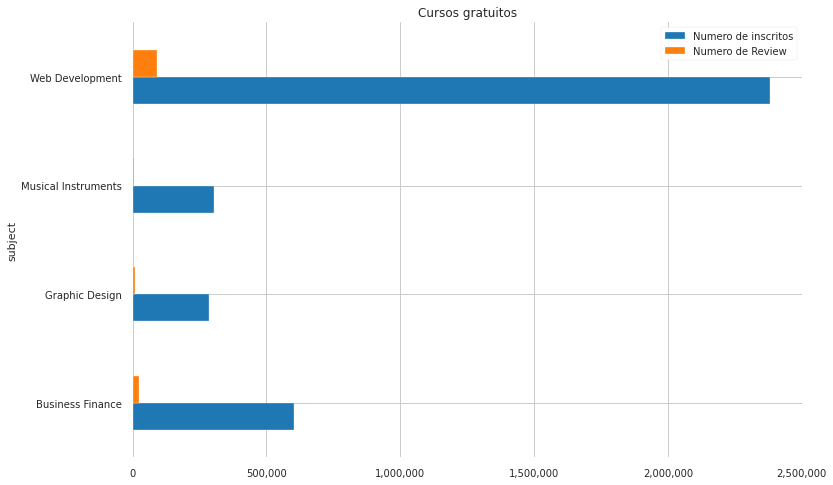

In [114]:
dfNotPaid = df.copy()
dfNotPaid = dfNotPaid.loc[dfNotPaid['is_paid'] == False]
dfNotPaid = dfNotPaid[['num_subscribers','num_reviews','subject']]
dfNotPaid.index=dfNotPaid['subject']

dfNotPaid = dfNotPaid.groupby([dfNotPaid.index]).sum()

plotNotPaid = dfNotPaid.plot(kind='barh', figsize=(12, 8), rot=0, grid=True,ylim=(0,2500),title="Cursos gratuitos")
plotNotPaid.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plotNotPaid.legend(["Numero de inscritos", "Numero de Review"]);

Analise de level por Subscribe e Reviwers

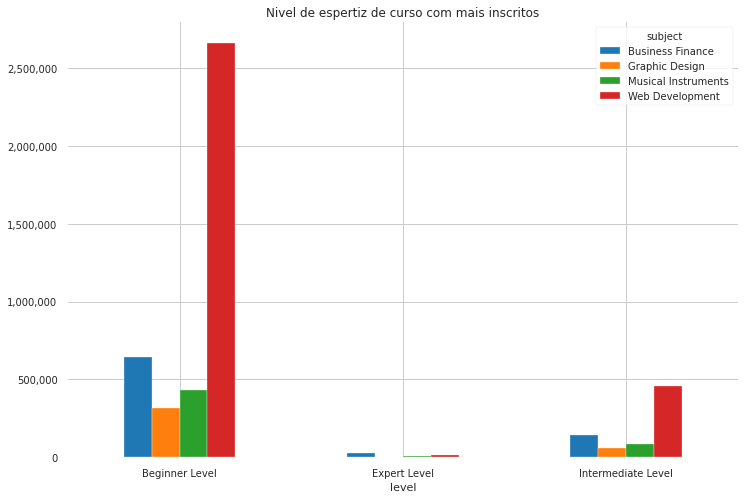

In [115]:
dfLevelSubscribe = df.copy()
dfLevelSubscribe = dfLevelSubscribe.loc[dfLevelSubscribe['level'] != 'All Levels']
dfLevelSubscribe = dfLevelSubscribe[['num_subscribers','level','subject']]

dfLevelSubscribe = dfLevelSubscribe.groupby([dfLevelSubscribe['level'],dfLevelSubscribe['subject']])['num_subscribers'].sum()
dfLevelSubscribe = dfLevelSubscribe.unstack()
#dfLevelSubscribe

plotLevelSubscribe = dfLevelSubscribe.plot(kind='bar', figsize=(12, 8), rot=0, grid=True,title="Nivel de espertiz de curso com mais inscritos")
plotLevelSubscribe.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

Categoria de cursos mais publicadas

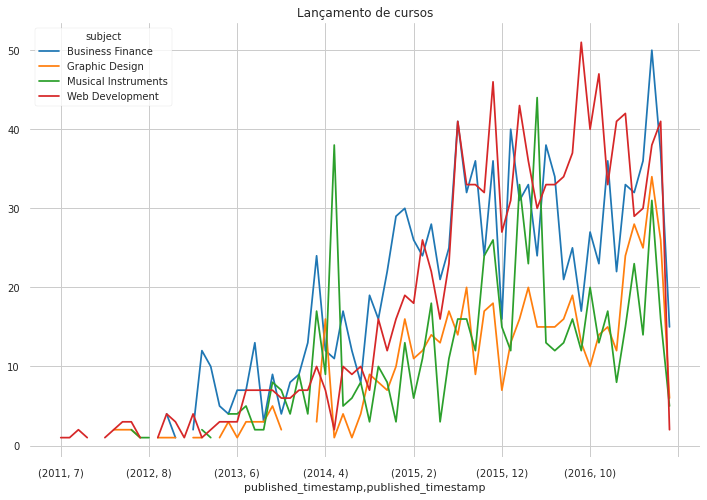

In [116]:
dfCategoryByDate =  df.copy()
dfCategoryByDate = dfCategoryByDate[['published_timestamp','subject']]
dfCategoryByDate.index=dfCategoryByDate['published_timestamp']
dfCategoryByDate = dfCategoryByDate.groupby([dfCategoryByDate.index.year,
                                             dfCategoryByDate.index.month, 
                                             'subject']).size()
dfCategoryByDate = dfCategoryByDate.unstack()
plotCategoryByDate = dfCategoryByDate.plot(kind='line', figsize=(12, 8), rot=0,
                                           grid=True,title="Lançamento de cursos")

Curiosidades: Curso mais caro, e curso com maior numero de inscritos

In [117]:
dfTop = df.copy()
